## Importing libraries


In [1]:
import kagglehub
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import dataset from Kaggle

In [2]:
# Downloading from Kagglehub
cached_path = kagglehub.dataset_download("uciml/iris")
print("Cached path:", cached_path)

# Choosinf my own folder to copy files to
target_folder = r"D:\AD_Lab\datasets\iris_dataset"

# Creating folder if it doesn't exist
os.makedirs(target_folder, exist_ok=True)

# Copy all files from cache → my desired folder
for file_name in os.listdir(cached_path):
    src = os.path.join(cached_path, file_name)
    dst = os.path.join(target_folder, file_name)
    shutil.copy(src, dst)

print("Dataset copied to:", target_folder)

Cached path: C:\Users\Shubh Agnihotri\.cache\kagglehub\datasets\uciml\iris\versions\2
Dataset copied to: D:\AD_Lab\datasets\iris_dataset


## Dataset loading using Pandas, not seaborn

In [3]:
df = pd.read_csv(r"D:\AD_Lab\datasets\iris_dataset\Iris.csv")
print(df.head())
print(df.info())

# sns.set(style="whitegrid", palette="muted", context="notebook") for sns (seaborn) style

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


## Handling missing values


In [4]:
# Cell: Handling missing values (Iris)
# Assumes df is already loaded (df = pd.read_csv(...))

import numpy as np

# 1) Quick check
print("Shape:", df.shape)
print("\nMissing counts per column:")
print(df.isna().sum())
print("\nMissing percentage:")
print((df.isna().mean() * 100).round(3))

# 2) (Optional) If you want to *demonstrate* imputation on Iris (it usually has no NaNs),
#    you can create a small synthetic missingness sample. Uncomment to use.
"""
rng = np.random.default_rng(42)
df_demo = df.copy()
# introduce ~5% missing in 'sepal length (cm)' and ~3% in 'petal width (cm)'
for col, frac in [('sepal length (cm)', 0.05), ('petal width (cm)', 0.03)]:
    n = len(df_demo)
    mask = rng.choice([False, True], size=n, p=[1-frac, frac])
    df_demo.loc[mask, col] = np.nan

print('\\nAfter synthetic missingness (demo):')
print(df_demo.isna().sum())
# use df_demo for the rest of the demo if you uncommented
"""

# 3) Choose input DataFrame for imputation: real df (no NaNs) or df_demo if you asked for synthetic NaNs
df_to_impute = df  # change to df_demo if you uncommented the synthetic block

# 4) Imputation strategy:
#    - numeric columns -> median (robust)
#    - categorical columns -> mode (most frequent)
numeric_cols = df_to_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_to_impute.select_dtypes(include=['object', 'category']).columns.tolist()

print("\nNumeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Numeric imputation (median)
df_imputed = df_to_impute.copy()
for c in numeric_cols:
    if df_imputed[c].isna().sum() > 0:
        med = df_imputed[c].median()
        df_imputed[c] = df_imputed[c].fillna(med)
        print(f"Imputed {c} with median = {med}")

# Categorical imputation (mode)
for c in categorical_cols:
    if df_imputed[c].isna().sum() > 0:
        mode_val = df_imputed[c].mode(dropna=True)
        fill = mode_val.iloc[0] if len(mode_val) > 0 else "Unknown"
        df_imputed[c] = df_imputed[c].fillna(fill)
        print(f"Imputed {c} with mode = {fill}")

print("\nMissing after imputation:")
print(df_imputed.isna().sum())

# Optional: save imputed file for record
out_path = r"D:\AD_Lab\datasets\iris_dataset\iris_imputed.csv"
df_imputed.to_csv(out_path, index=False)
print("\nSaved imputed dataset to:", out_path)


Shape: (150, 6)

Missing counts per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Missing percentage:
Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

Numeric columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Categorical columns: ['Species']

Missing after imputation:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Saved imputed dataset to: D:\AD_Lab\datasets\iris_dataset\iris_imputed.csv


## Encoding categorical data

In [5]:
# Cell: Encoding categorical data (Iris)
# Uses df_imputed created in the previous cell

# Identify categorical columns (again)
cat_cols = df_imputed.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)

# 1) Label encoding (category -> integer codes)
df_label = df_imputed.copy()
for c in cat_cols:
    df_label[c + "_code"] = df_label[c].astype('category').cat.codes

print("\nLabel encoded sample:")
display(df_label.head())

# 2) One-hot encoding (dummy variables) - recommended for linear models
df_onehot = pd.get_dummies(df_imputed, columns=cat_cols, drop_first=True)
print("\nOne-hot encoded sample (first 5 cols):")
display(df_onehot.head())

# Save encoded versions
out1 = r"D:\AD_Lab\datasets\iris_dataset\iris_label_encoded.csv"
out2 = r"D:\AD_Lab\datasets\iris_dataset\iris_onehot.csv"
df_label.to_csv(out1, index=False)
df_onehot.to_csv(out2, index=False)
print("\nSaved label-encoded ->", out1)
print("Saved one-hot encoded ->", out2)


Categorical columns: ['Species']

Label encoded sample:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0



One-hot encoded sample (first 5 cols):


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False



Saved label-encoded -> D:\AD_Lab\datasets\iris_dataset\iris_label_encoded.csv
Saved one-hot encoded -> D:\AD_Lab\datasets\iris_dataset\iris_onehot.csv


## Feature Scaling

In [6]:
# Cell: Feature scaling (Iris)
# We'll scale only numeric measurement columns. Uses df_imputed (or df_onehot if you prefer)

# Select numeric measurement columns (adjust names to match your CSV)
# Typical iris columns: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
measure_cols = [c for c in df_imputed.columns if ('sepal' in c.lower() or 'petal' in c.lower()) and df_imputed[c].dtype != 'object']
print("Measure columns:", measure_cols)

# 1) Standard scaling (Z-score) — pandas only
df_std = df_imputed.copy()
df_std[measure_cols] = (df_std[measure_cols] - df_std[measure_cols].mean()) / df_std[measure_cols].std()
print("\nStandard-scaled sample (means approx 0):")
display(df_std[measure_cols].agg(['mean','std']).round(3))

# 2) Min-Max scaling (0 to 1) — pandas only
df_mm = df_imputed.copy()
df_mm[measure_cols] = (df_mm[measure_cols] - df_mm[measure_cols].min()) / (df_mm[measure_cols].max() - df_mm[measure_cols].min())
print("\nMin-Max scaled sample (min,max):")
display(df_mm[measure_cols].agg(['min','max']).round(3))

# Optional: sklearn scalers (for reproducible pipelines) — uncomment to use
"""
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
df_scaled_sklearn = df_imputed.copy()
df_scaled_sklearn[measure_cols] = sc.fit_transform(df_scaled_sklearn[measure_cols])
# save scaler object: joblib.dump(sc, 'iris_standard_scaler.joblib')
"""

# Save scaled outputs
out_std = r"D:\AD_Lab\datasets\iris_dataset\iris_standard_scaled.csv"
out_mm = r"D:\AD_Lab\datasets\iris_dataset\iris_minmax_scaled.csv"
df_std.to_csv(out_std, index=False)
df_mm.to_csv(out_mm, index=False)
print("\nSaved standard-scaled ->", out_std)
print("Saved minmax-scaled ->", out_mm)


Measure columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Standard-scaled sample (means approx 0):


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0



Min-Max scaled sample (min,max):


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0



Saved standard-scaled -> D:\AD_Lab\datasets\iris_dataset\iris_standard_scaled.csv
Saved minmax-scaled -> D:\AD_Lab\datasets\iris_dataset\iris_minmax_scaled.csv


## Histogram using matplotlib.pyplot.hist()

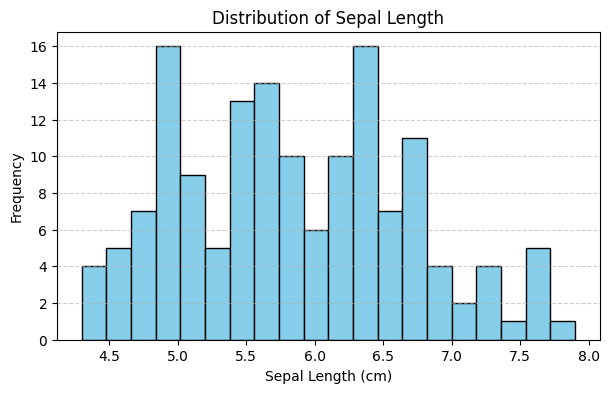

In [7]:
# Cell — Histogram of a feature (Iris)

plt.figure(figsize=(7,4))
plt.hist(df_imputed['SepalLengthCm'], bins=20, edgecolor='black', color='skyblue')
plt.title("Distribution of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## Scatter plot using seaborn.scatterplot()

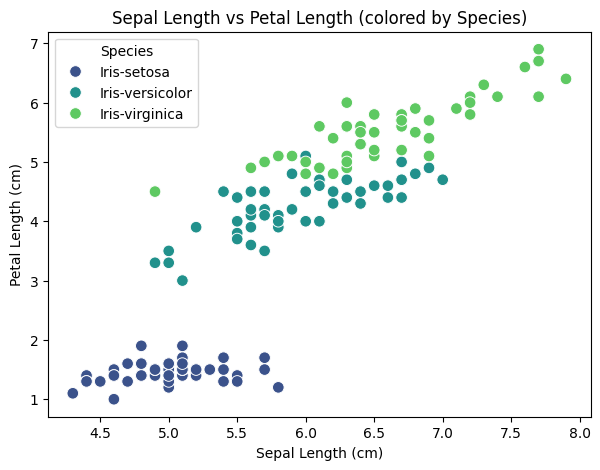

In [8]:
# Cell — Scatterplot to study relationships (Iris)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_imputed,
    x='SepalLengthCm',
    y='PetalLengthCm',
    hue='Species',
    s=70,
    palette='viridis'
)

plt.title("Sepal Length vs Petal Length (colored by Species)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.show()


## Correlation heatmap (seaborn.heatmap)

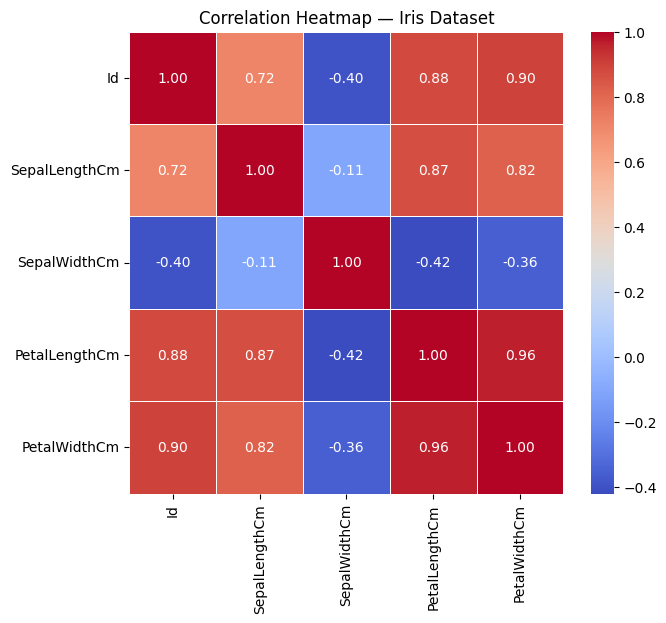

In [9]:
# Cell — Correlation heatmap (Iris)

# Select only numeric columns (drop Species if it's not numeric)
num_cols = df_imputed.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(7,6))
sns.heatmap(
    df_imputed[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap — Iris Dataset")
plt.show()
